In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

df = pd.read_csv(r"car_price_prediction.csv")

In [61]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [62]:
df.shape

(19237, 18)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

c:\Users\WAH-17\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


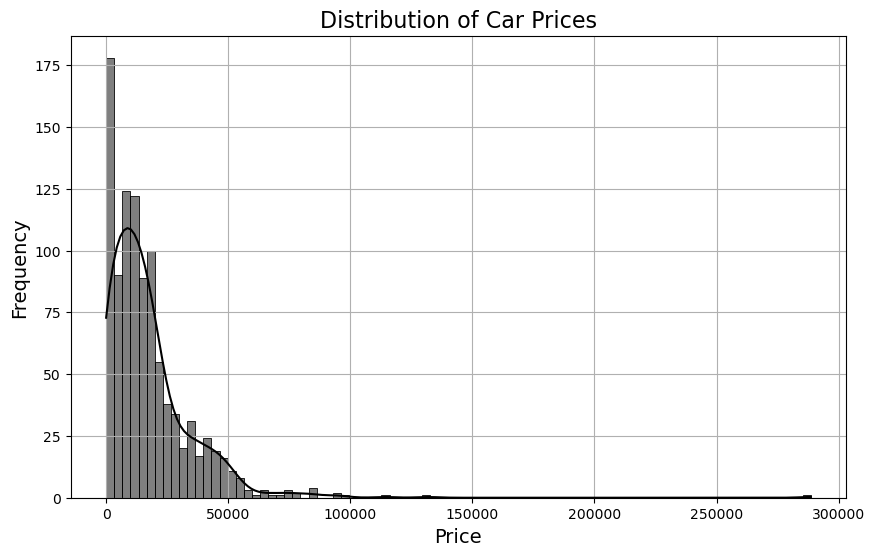

In [67]:
# Select a random sample of 1000 rows
df_sampled = df.sample(n=1000, random_state=42)

# Color palette
sns.set_palette(["#f7e227", "#000000", "#ff4d4d"])

# Visualization 1: Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_sampled['Price'], kde=True, color='black')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


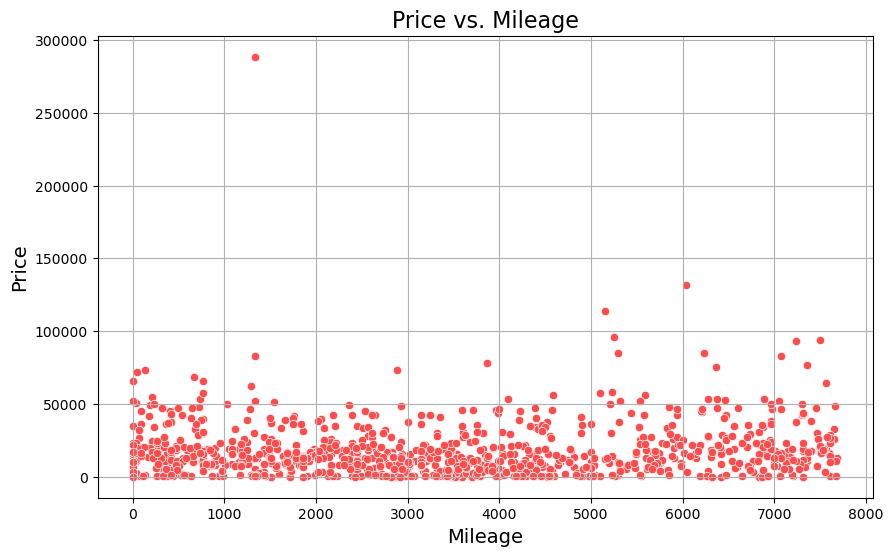

In [77]:
# Select a random sample of 1000 rows
df_sampled = df.sample(n=1000, random_state=42)

# Visualization 2: Price vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df_sampled, color='#ff4d4d')
plt.title('Price vs. Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()


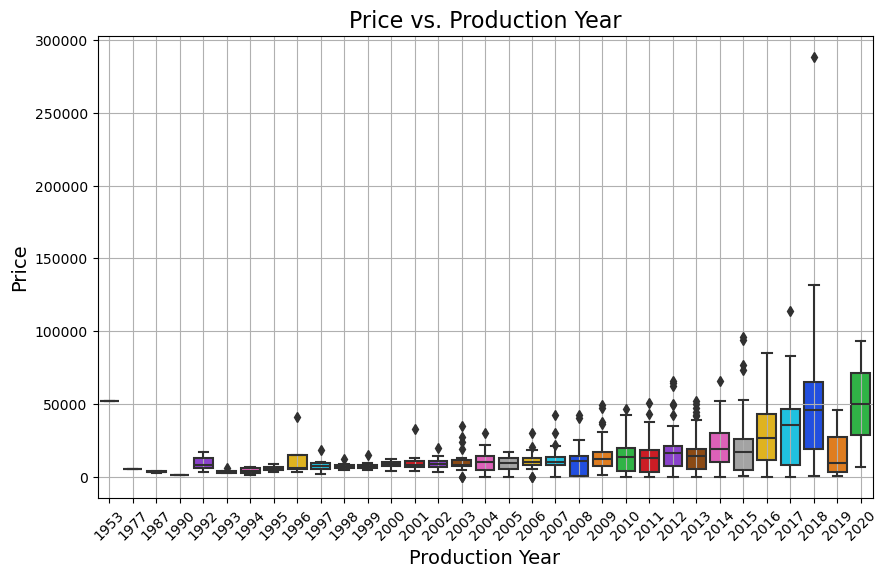

In [69]:
# Select a random sample of 1000 rows
df_sampled = df.sample(n=1000, random_state=42)

# Visualization 3: Price vs. Production Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prod. year', y='Price', data=df_sampled, palette='bright')
plt.title('Price vs. Production Year', fontsize=16)
plt.xlabel('Production Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [70]:
df = df.drop(['ID','Levy','Doors', 'Drive wheels'], axis=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Wheel             19237 non-null  object 
 12  Color             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.1+ MB


In [72]:
df['Mileage'] = df['Mileage'].str.rstrip(' km')

df

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Left wheel,Silver,5
19233,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Left wheel,Red,8
19234,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Left wheel,Grey,4
19235,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Left wheel,Black,4


r2 score: 0.5408712182344334
mean absolute error: 5610.466659330248
mean squared error: 172013868.1739279


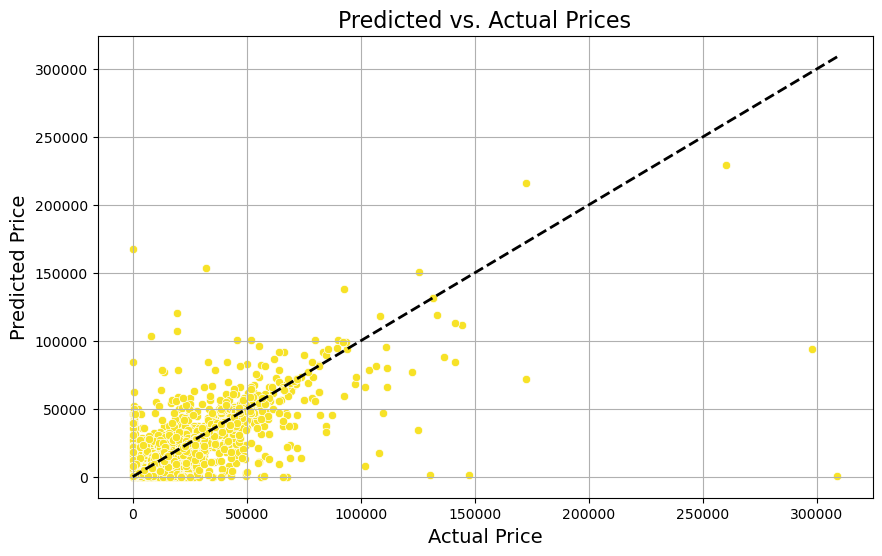

CPU times: total: 656 ms
Wall time: 762 ms


In [73]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

objectcolumns = df.select_dtypes('object').columns.to_list()
objectcolumns
le = LabelEncoder()
for i in objectcolumns:
    df[i] = le.fit_transform(df[i])

df

X = df.drop('Price', axis = True)
y = df['Price']
model1 = DecisionTreeRegressor(random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print('r2 score:', r2_score(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))
print("mean squared error:", mean_squared_error(y_test, y_pred))

# Visualization 4: Predicted vs. Actual Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='#f7e227')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.grid(True)
plt.show()

r2 score: 0.6652599413689402
mean absolute error: 5602.86507801504
mean squared error: 128387023.87276419


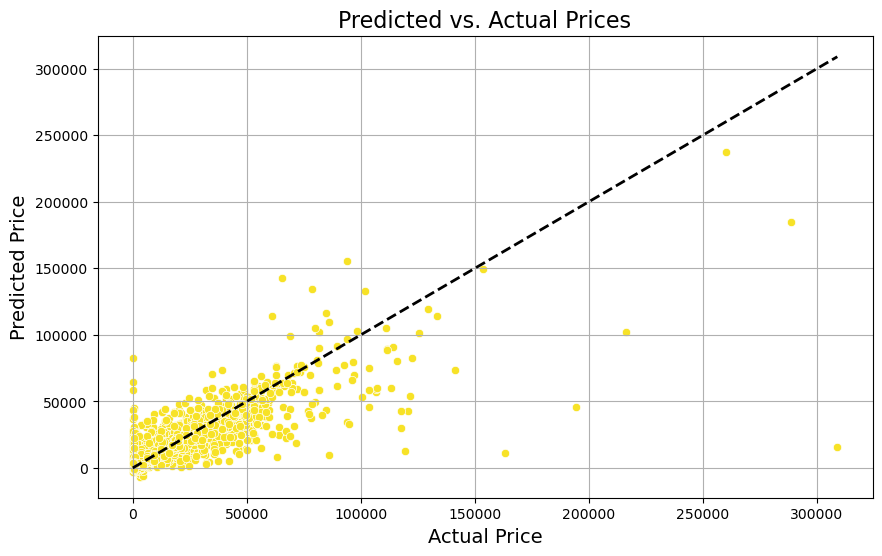

CPU times: total: 1.44 s
Wall time: 684 ms


In [74]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

objectcolumns = df.select_dtypes('object').columns.to_list()
objectcolumns
le = LabelEncoder()
for i in objectcolumns:
    df[i] = le.fit_transform(df[i])

df

X = df.drop('Price', axis = True)
y = df['Price']
model2 = XGBRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print('r2 score:', r2_score(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))
print("mean squared error:", mean_squared_error(y_test, y_pred))

# Visualization 4: Predicted vs. Actual Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='#f7e227')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.grid(True)
plt.show()

mean absolute error: 5997.085225546289
mean squared error: 119049478.37073572
r2 score: 0.6822404928484322


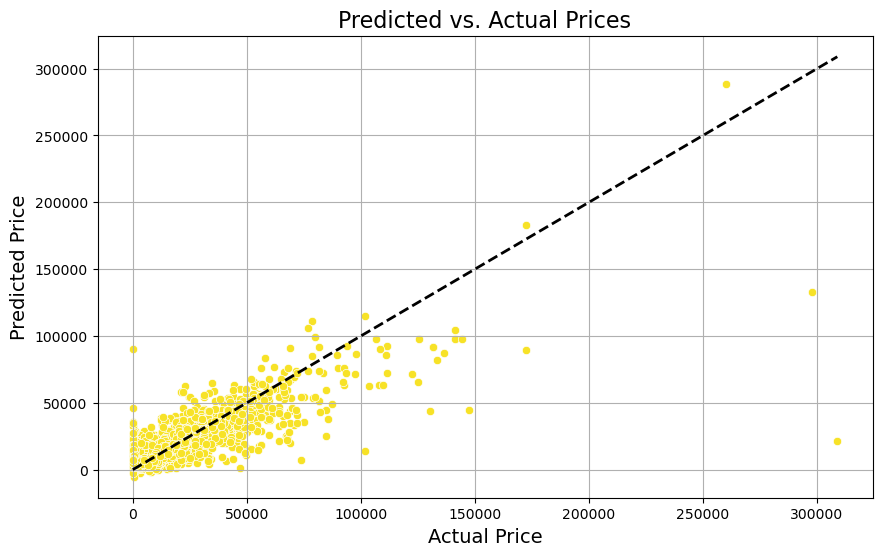

CPU times: total: 16.4 s
Wall time: 6.71 s


In [75]:
%%time
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

categorical_columns = df.select_dtypes('object').columns
df[categorical_columns] = df[categorical_columns].astype('category')


X = df.drop('Price', axis = True)
y = df['Price']
model3 = CatBoostRegressor(
    iterations=1000,           
    learning_rate=0.05,         
    depth=6,                   
    loss_function='RMSE',
    random_seed=50,
    verbose=False
)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

model3.fit(X_train, y_train, cat_features = categorical_columns.tolist())
y_pred = model3.predict(X_test)



print('mean absolute error:', mean_absolute_error(y_test, y_pred))
print("mean squared error:", mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

# Visualization 4: Predicted vs. Actual Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='#f7e227')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.grid(True)
plt.show()

In [76]:
import pickle
pickle.dump(model2, open('model1.pkl', 'wb'))